Chapter 13 & 14 of Handbook Of Quantitative Ecology

- Transition Matrices/Succession
- Absorbation

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


In [87]:
def sapling_pop(years, initial_beech, initial_maple, initial_other):

    #Create a matrix to represent the transition of the population between years
    A = np.array([ [0.8,.25,.1], [.1,.15,.25], [.1,.6,.65] ])
    initial_population_vector = np.array([initial_beech, initial_maple, initial_other])
    #Create an array to store the total population each year
    beech_population = []
    maple_population = []
    other_population = []
    #append the current population to the list
    beech_population.append(initial_population_vector[0])
    maple_population.append(initial_population_vector[1])
    other_population.append(initial_population_vector[2])

    n_t = initial_population_vector
    for years in range(years):
        n_t = np.dot(A, n_t)
        beech_population.append(n_t[0])
        maple_population.append(n_t[1])
        other_population.append(n_t[2])

    return beech_population, maple_population, other_population

beech_population, maple_population, other_population = sapling_pop(50, 1, 20, 79)

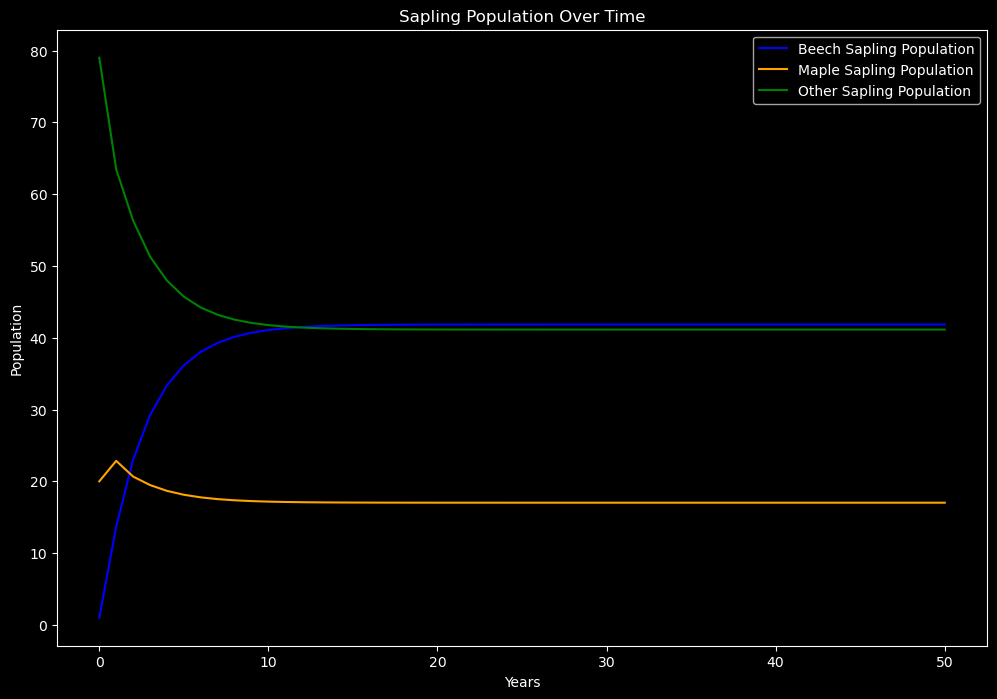

In [88]:
#plot the population of each age group and the total population over time
plt.figure(figsize=(12,8))
style.use('dark_background')
plt.plot(beech_population, label='Beech Sapling Population', color='blue')
plt.plot(maple_population, label='Maple Sapling Population', color='orange')
plt.plot(other_population, label='Other Sapling Population', color='green')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Sapling Population Over Time')
plt.legend()
plt.show()

### 1. What is the stationary state distribution of this population?

In [83]:

A = np.array([
    [0.8, 0.25, 0.1],
    [0.1, 0.15, 0.25],
    [0.1, 0.6, 0.65]
])

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the eigenvector corresponding to eigenvalue closest to 1
i = np.argmin(np.abs(eigenvalues - 1))
stationary = np.real(eigenvectors[:, i])
stationary = stationary / np.sum(stationary)  # normalize to sum to 1

print("Stationary distribution (Beech, Maple, Other):")
print(stationary)


Stationary distribution (Beech, Maple, Other):
[0.41843972 0.17021277 0.41134752]



### 2. What is the probability that a randomly selected individual from this population at year 50 is a Maple?



In [85]:

# Compute probability that an individual at year 50 is a Maple
total_year50 = (
    beech_population[-1]
    + maple_population[-1]
    + other_population[-1]
)
prob_maple_50 = maple_population[-1] / total_year50

print(f"Probability that a randomly selected individual at year 50 is Maple: {prob_maple_50:.4f}")


Probability that a randomly selected individual at year 50 is Maple: 0.1702


## Chapter 14

For this particular species, the probability of local extinction in a given year appears to be around 13% in the smaller patch and 3% in the larger patch, and the probability of either empty patch being recolonized by butterflies from the other occupied patch in a given year is about 2%.

e<sub>A</sub> = 13%, e<sub>B</sub> = 3%, c<sub>A</sub> or c<sub>B</sub> = 2%

Martix Chart
![Screenshot 2025-10-23 112830.png](<attachment:Screenshot 2025-10-23 112830.png>)


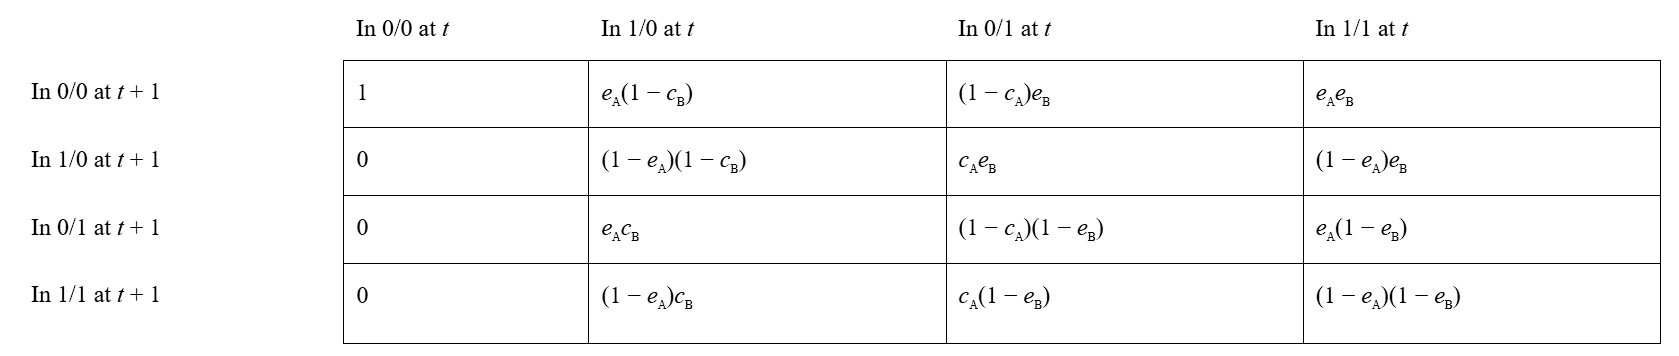

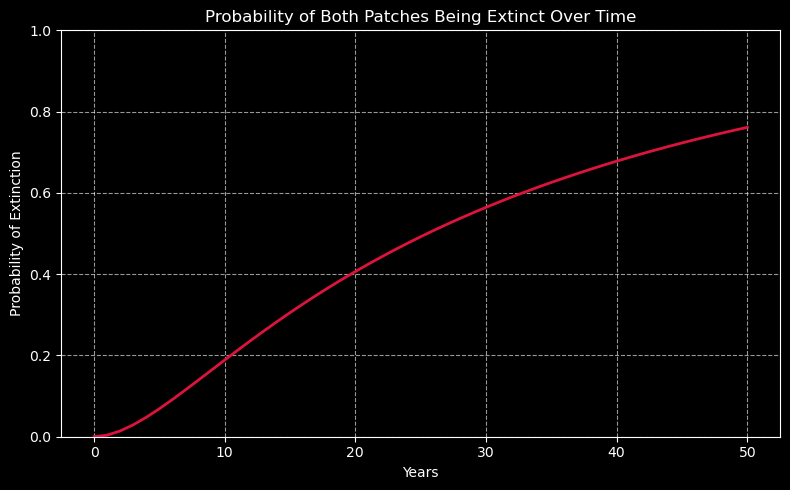

In [ ]:

# Transition matrix
A = np.array([
    [1.0,     0.0,     0.0,    0.0],     # 0/0 (absorbing)
    [0.0294,  0.9506,  0.0006, 0.0194],  # 0/1
    [0.1274,  0.0026,  0.8526, 0.0174],  # 1/0
    [0.0039,  0.1261,  0.0261, 0.8439]   # 1/1 (populating)
])

# Initial state: both patches populated
initial_state = np.array([0, 0, 0, 1])

# Simulation function
def metapopulation_sim(years, initial_state, A):
    n_t = initial_state
    history = [n_t]
    for _ in range(years):
        n_t = n_t @ A
        history.append(n_t)
    return np.array(history)

# Run simulation for 50 years
years = 50
history = metapopulation_sim(years, initial_state, A)

# Extract probability of both patches extinct (z_z)
prob_extinct = history[:, 0]

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(years+1), prob_extinct, color='crimson', linewidth=2)
plt.title('Probability of Both Patches Being Extinct Over Time')
plt.xlabel('Years')
plt.ylabel('Probability of Extinction')
plt.ylim(0,1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 1. What is the probability that both plots will be extinct after 50 years?

In [89]:
# Using the history array from the previous simulation
prob_extinct_50 = history[50, 0]  # state z_z at year 50
print(f"Probability that both patches are extinct after 50 years: {prob_extinct_50:.4f}")


Probability that both patches are extinct after 50 years: 0.7613
